In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
data=pd.read_csv('employee.csv')
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [3]:
data.shape

(9, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [5]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


<AxesSubplot:xlabel='gender', ylabel='count'>

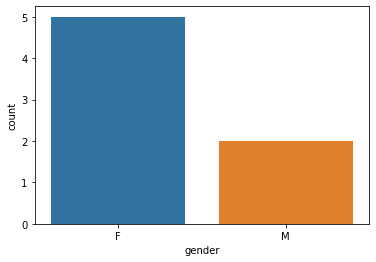

In [6]:
sns.countplot(x='gender',data=data)

Female employees as more than male employees

In [7]:
data.isnull().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

### 2. Reset the index as "name".


In [8]:
data.set_index('name',inplace=True)

In [9]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3. Select rows for specific names Jack Morgan and Josh wills.


In [10]:
data.loc[["Jack Morgan", "Josh Wills"]]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.


In [11]:
data[data['department'].isin(['Finance','Sales'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score.


In [12]:
data[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6. Display employee who has more than 500 and less than 700 performance score


In [13]:
print(data[(data['performance_score']>500)&data['performance_score']<700])

                age   income gender  department grade  performance_score
name                                                                    
Allen Smith    45.0      NaN    NaN  Operations    G3                723
S Kumar         NaN  16000.0      F     Finance    G0                520
Jack Morgan    32.0  35000.0      M     Finance    G2                674
Ying Chin      45.0  65000.0      F       Sales    G3                556
Dheeraj Patel  30.0  42000.0      F  Operations    G2                711
Satyam Sharma   NaN  62000.0    NaN       Sales    G3                649
James Authur   54.0      NaN      F  Operations    G3                 53
Josh Wills     54.0  52000.0      F     Finance    G3                901
Leo Duck       23.0  98000.0      M       Sales    G4                709


### 7. Check and handle missing values in the dataset.


In [14]:
a=data.isnull()

<AxesSubplot:ylabel='name'>

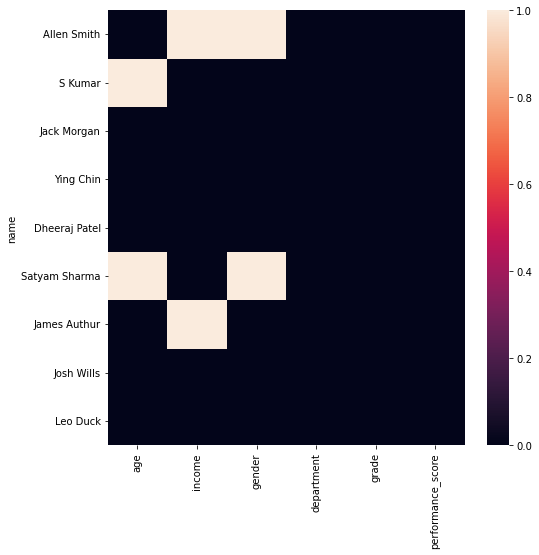

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(a)

There are null values in age ,income and gender . Lets handle it

In [16]:
#handle nan value using median
data['income']=data['income'].fillna(data['income'].median())

In [17]:
#handle nan value using mean
data['age']=data['age'].fillna(data['age'].mean())

In [18]:
#handle nan value using mode
data['gender']=data['gender'].fillna(data['gender'].mode()[0])

In [19]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,F,Operations,G3,723
S Kumar,40.428571,16000.0,F,Finance,G0,520
Jack Morgan,32.000000,35000.0,M,Finance,G2,674
Ying Chin,45.000000,65000.0,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711
Satyam Sharma,40.428571,62000.0,F,Sales,G3,649
James Authur,54.000000,52000.0,F,Operations,G3,53
Josh Wills,54.000000,52000.0,F,Finance,G3,901
Leo Duck,23.000000,98000.0,M,Sales,G4,709


### 8. Check the outliers and handle outliers in performance score using Percentiles.


{'whiskers': [<matplotlib.lines.Line2D at 0x1fae3571fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fae33f5640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fae3571cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fae33f5b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fae33f5df0>],
 'means': []}

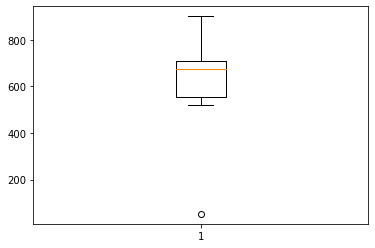

In [20]:
plt.boxplot(data['performance_score'])

In [21]:
q1=np.percentile(data['performance_score'],25)
q3=np.percentile(data['performance_score'],75)
iqr=q3-q1
low_lim=q1-1.5*iqr
up_lim=q3+1.5*iqr
ind2=data['performance_score']<low_lim
q=data.loc[ind2].index
data.drop(q,inplace=True)

In [22]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,F,Operations,G3,723
S Kumar,40.428571,16000.0,F,Finance,G0,520
Jack Morgan,32.000000,35000.0,M,Finance,G2,674
Ying Chin,45.000000,65000.0,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711
Satyam Sharma,40.428571,62000.0,F,Sales,G3,649
Josh Wills,54.000000,52000.0,F,Finance,G3,901
Leo Duck,23.000000,98000.0,M,Sales,G4,709


### 9. Check the gender column and do Dummy encoding.


In [23]:
data_dummy=pd.get_dummies(data,columns=['gender'])
data_dummy

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.000000,52000.0,Operations,G3,723,1,0
S Kumar,40.428571,16000.0,Finance,G0,520,1,0
Jack Morgan,32.000000,35000.0,Finance,G2,674,0,1
Ying Chin,45.000000,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.000000,42000.0,Operations,G2,711,1,0
Satyam Sharma,40.428571,62000.0,Sales,G3,649,1,0
Josh Wills,54.000000,52000.0,Finance,G3,901,1,0
Leo Duck,23.000000,98000.0,Sales,G4,709,0,1


In [24]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,F,Operations,G3,723
S Kumar,40.428571,16000.0,F,Finance,G0,520
Jack Morgan,32.000000,35000.0,M,Finance,G2,674
Ying Chin,45.000000,65000.0,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711
Satyam Sharma,40.428571,62000.0,F,Sales,G3,649
Josh Wills,54.000000,52000.0,F,Finance,G3,901
Leo Duck,23.000000,98000.0,M,Sales,G4,709


### 10.Do the standard scaling on the feature performance score.

In [25]:
from sklearn.preprocessing import StandardScaler
val=['performance_score']
f=data_dummy[val]
scaler=StandardScaler().fit(data[val].values)
f=scaler.transform(f.values)
data_dummy[val]=f

In [26]:
data_dummy

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.000000,52000.0,Operations,G3,0.392262,1,0
S Kumar,40.428571,16000.0,Finance,G0,-1.475872,1,0
Jack Morgan,32.000000,35000.0,Finance,G2,-0.058667,0,1
Ying Chin,45.000000,65000.0,Sales,G3,-1.144578,1,0
Dheeraj Patel,30.000000,42000.0,Operations,G2,0.281831,1,0
Satyam Sharma,40.428571,62000.0,Sales,G3,-0.288733,1,0
Josh Wills,54.000000,52000.0,Finance,G3,2.030331,1,0
Leo Duck,23.000000,98000.0,Sales,G4,0.263425,0,1
